# Binary classification by linear regression in Python

### Overview
Although linear regression is labelled as a regression technique it can be used for classification. In this demonstration I will use linear regression for binary classification.

### Environment
I implemented a solution in `Anaconda` environment with `Python 3.8.5` as this is essentially 'data-science'. This makes it possible to comparing my results to that of `sci-kit-learn`.

### Terminology
1. $y^{(i)}$; **true** (actual) class label.
2. $\hat{y}^{(i)}$; **predicted** class label.
3. $x^{(i)}$; training example.
4. $\phi(z)$; decision function.
5. $\displaystyle\sum_{j=0}^{m} x_j w_j$; linear algebra product of weights to sample-features.
6. $\Delta w_j = \eta(y^{(i)} - \hat{y}^{(i)})x_j$; difference in weight between epochs.

### Algorithm pseudo-code
1. Initialize weights $w$ to small random numbers.
2. For each training sample $x^{(i)}$:  
    a. Compute decision $\phi(z)$ for output $\hat{y}$  
    b. Update weights; $w_j := w_j + \Delta w_j$, and $\Delta w_j$ is derived by; $\Delta w_j = \eta(y^{(i)} - \hat{y}^{(i)})x_j$

### Related Git
https://dev.azure.com/Rose-Software-Ltd/_git/LinearRegressionPython

## Demonstration setup
1. Import my Python package components from `my_linear_regression` and instantiate a linear regressor for binary classification.  
1. Read iris.csv. 
1. Specify the feature space to use.
1. Add an integer representation for the class space to the dataframe. 
1. Split samples into 3 classes.
1. Add class integer representation.
1. Split training and test data using classes `'Iris-versicolor'` and `'Iris-setosa'`, and a split of 20:80.

In [3]:
#!/usr/bin/env python3.8.5
# Copyright 2021, Rose Software Ltd, All rights reserved.

# Project imports.
from my_linear_regression.linear_regression import LinearRegressor

# Third party imports.
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# Read the file.
LOCAL_USER = os.getlogin()
DATA_DIR = f'C:\\Users\\{LOCAL_USER}\\source\\repos\\LinearRegressionPython\\data\\IRIS.csv'
df = pd.read_csv(DATA_DIR)

# Select features by index.
feat_idx = [0,2]
labl_idx = [4,5]

# Add int representation of the class space label.
df.loc[df['species'] == 'Iris-versicolor', 'cls_int_rep'] = 1
df.loc[df['species'] == 'Iris-setosa', 'cls_int_rep'] = -1

# Split samples by class.
samples_versi = np.array(df[df.species == 'Iris-versicolor'].iloc[0:50, feat_idx].values)
samples_setos = np.array(df[df.species == 'Iris-setosa'].iloc[0:50, feat_idx].values)
samples_virgi = np.array(df[df.species == 'Iris-virginica'].iloc[0:50, feat_idx].values)

# Get label & int representation of label.
labels_versi = np.array(df[df.species == 'Iris-versicolor'].iloc[0:50, labl_idx].values)
labels_setos = np.array(df[df.species == 'Iris-setosa'].iloc[0:50, labl_idx].values)

# Train/test and label arrays.
samples_train = np.concatenate((samples_versi[0:10], samples_setos[0:10]))
samples_test = np.concatenate((samples_versi[10:], samples_setos[10:]))
labels_train = np.concatenate((labels_versi[0:10], labels_setos[0:10]))
labels_test = np.concatenate((labels_versi[10:], labels_setos[10:]))


## Plot data prior to training function
Plotting the sepal_length on x and the petal_length on y for all samples in the chosen class space of `'Iris-versicolor'` and `'Iris-setosa'`.

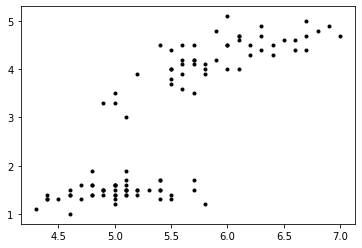

In [5]:
X = np.concatenate((samples_train, samples_test))
plt.scatter(x=X[0:,0], y=X[0:,1], color='black', marker='.')


## Train the model
Instantiate the linear regressor (in this case a Perceptron) and initiate training. There are **4 features** in this data set, but i seleted *2*. We will use a default $\eta$ of 0.001 and 50 epochs (simulations) to fit the function.

In [7]:
# Instantiate a Perceptron linear regressor.
my_lr = LinearRegressor(samples_train, samples_test, labels_train, labels_test)

# Train (evolve) a neuron that has 0 misclassifications on the training data.
my_lr.train_model()

# Store state from best neuron (you can play around with different neurons this way..).
neuron = my_lr.get_evolutions()[-1]


RandomState(MT19937)
[ 0.01624345 -0.00611756 -0.00528172]


## Test the model and plot predictions and evolution
Plot predictions and the evolution of the best neuron.

No handles with labels found to put in legend.


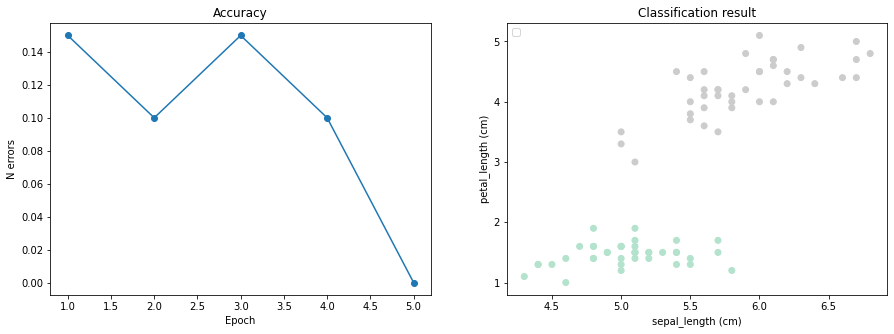

In [8]:
# Predict the class labels for the test samples.
lbl, cls_, pre = my_lr.test_model(neuron)
mrk = ['s', 'x', 'o', '^', 'v']

# Get evolution reports.
err_rate = [ x.report[1] for x in my_lr.evolutions ]
epochs = range(1, len(err_rate)+1)

# Setup plots.
fig, axs = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)

# Plot evolution.
axs[0].plot(epochs, err_rate, marker='o')
axs[0].set(xlabel='Epoch', ylabel='N errors')
axs[0].set_title('Accuracy')

# Plot classifications.
axs[1].scatter(samples_test[0:, 0], samples_test[0:, 1], c=pre, cmap='Pastel2')
axs[1].set(xlabel='sepal_length (cm)', ylabel='petal_length (cm)')
axs[1].set_title('Classification result')
axs[1].legend(loc='upper left')
